# Datasets and variables using numpy, matplotlib and pandas

*Requirements*: 
Your jupyter notebook should run in an environment with:
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`

## Introduction to numpy

Full documentation is available [here](https://numpy.org/) and introduction tutorials are available [here](https://numpy.org/learn/).

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by **a tuple of non-negative integers**. In NumPy dimensions are called **axes**.

### Arrays

In [1]:
import numpy as np

In [2]:
one_dimensional = np.array([1, 2, 3])
two_dimensional = np.array([[1, 2, 3], [4, 5, 6]])

Axes can be accessed by their index:

In [3]:
# Row access
print(two_dimensional[1,:])

# Column access
print(two_dimensional[:,1])

[4 5 6]
[2 5]


#### Exercise:
Write a function that returns the value at index `row_ix` for the row and `col_ix` for the column.


In [4]:
def array_indexer(input_array, row_ix, col_ix):
    """Returns the value at row_ix and col_ix for input_array.
    
    if row_ix==":":
        print(input_array[:,col_ix])
    elif col_ix==":":
        print(input_array[row_ix,:])
    else:
    return
    """
    
    print(input_array[row_ix,col_ix])
    
array_indexer(two_dimensional,1,2)

6


### Masking
Masking allows to select only values from an array according to an array of booleans.

In [5]:
# Compare array values to a set value
mask = two_dimensional > 2
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [6]:
# Get values of the array respecting this mask
two_dimensional[mask]

array([3, 4, 5, 6])

## Computing statistical indicators
Numpy comes with lots of functions to compute statistical indicators, either overall the values, or overcolumns and rows.

In [7]:
# Over columns
print(np.mean(two_dimensional, axis=1))

# Over rows
print(np.mean(two_dimensional, axis=0))

# Overall
print(np.mean(two_dimensional))

[2. 5.]
[2.5 3.5 4.5]
3.5


### Exercices: 
Compute the standard error and the median for each row/column of the array `two_dimensional`.

In [8]:
#over rows
#sd
print(f"standard deviation : {np.std(two_dimensional, axis=1,ddof=1)}")
#mean
print(f"mean : {np.mean(two_dimensional, axis=1)}")
#over colums
#sd
print(f"standard deviation : {np.std(two_dimensional, axis=0,ddof=1)}")
#mean
print(f"mean :{np.mean(two_dimensional, axis=0)}")

standard deviation : [1. 1.]
mean : [2. 5.]
standard deviation : [2.12132034 2.12132034 2.12132034]
mean :[2.5 3.5 4.5]


## Plotting using matplotlib
> Add the matplotlib library to your virtual environment `pip install matplotlib`

Matplotlib is a module for generating 2D and 3D graphics. Documentation is available [here](https://matplotlib.org/api/pyplot_summary.html). A set of tutorials are available [here](https://matplotlib.org/stable/tutorials/index.html).

Matplotlib is both **complex** and **very powerful**, so it may take a while for you to learn its full power.

In [9]:
# Generate a random vector for plotting
random_vector = np.random.normal(0, 10, 1000)

### Plotting an histogram

In [10]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'André was here!')

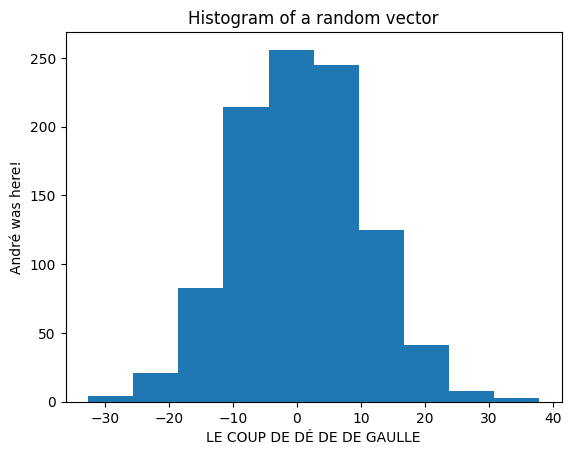

In [28]:
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")
plt.xlabel("LE COUP DE DÉ DE DE GAULLE")
plt.ylabel('André was here!')

#### Exercice:
Add the labels for the x axis and the y axis on the above plot.

### Plotting a boxplot

Text(0.5, 1.0, 'Boxplot of a random vector')

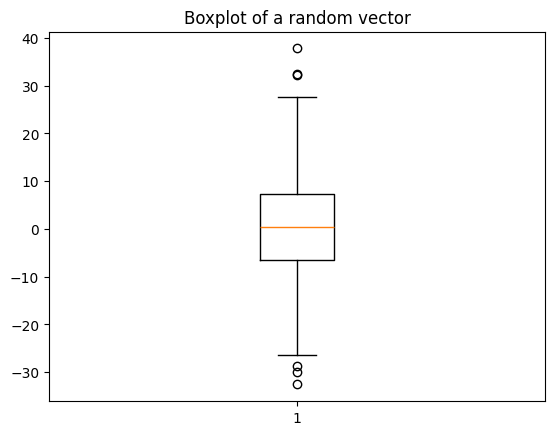

In [12]:
plt.boxplot(x=random_vector)
plt.title("Boxplot of a random vector")

#### Exercice:
Using the same data vector, plot a [violin plot] and play with the different options (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

Text(0.5, 1.0, 'Boxplot of a random vector')

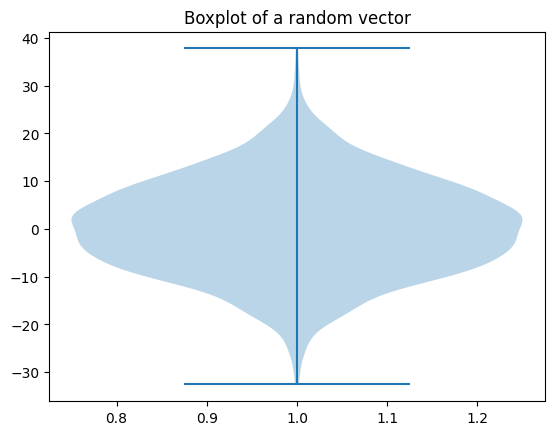

In [13]:
plt.violinplot(random_vector)
plt.title("Boxplot of a random vector")

### Scatter plots
To plot the repartition of two numerical variables, **scatter plots** can be used.

In [14]:
random_vector_1 = np.random.normal(0, 10, 1000)
random_vector_2 = np.random.normal(0, 10, 1000)

Text(0, 0.5, 'Vector 2')

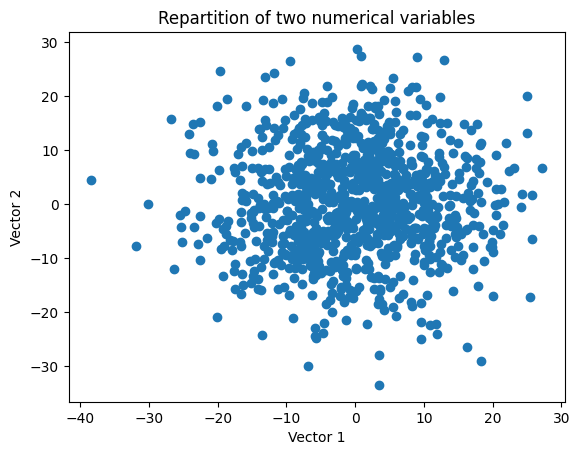

In [15]:
plt.scatter(random_vector_1, random_vector_2)
plt.title("Repartition of two numerical variables")
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")

## Introduction to pandas

Pandas is a very easy to use library for data manipulation (but it can be tricky, because it's so easy to use you'll only rely on pandas afterwards even though it's **slower**).
Full documentation of pandas is [here](https://pandas.pydata.org/) and introduction is [here](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframes
Dataframes (and Series, their one dimensional counterparts) is the pandas class that holds multi-dimensional data.

In [16]:
import pandas as pd

df = pd.DataFrame({"col_0": random_vector_1, "col_1": random_vector_2})

In [17]:
type(df)

pandas.core.frame.DataFrame

Dataframes can be indexed by its location or by its index.

In [18]:
# By column name
df["col_0"]
df.col_0

# By index of column
df.iloc[:,0]

0      -6.898481
1       0.105746
2     -15.983794
3      -2.124757
4      -4.983310
         ...    
995    13.876600
996    13.658596
997    -7.569422
998    -0.040337
999    13.062462
Name: col_0, Length: 1000, dtype: float64

The numpy array can be accessed using the `values` attribute (**it will be important for further labs and for matplotlib**).

In [19]:
df.values

array([[ -6.89848113,  -8.39599084],
       [  0.10574622, -11.957045  ],
       [-15.98379439,   1.73960289],
       ...,
       [ -7.56942169, -10.0929695 ],
       [ -0.04033722,  -8.68679876],
       [ 13.06246184,   5.59746765]])

### Computing statistical indicators

A generic describes method is available to compute at once all the statistical estimators on a dataset.

In [20]:
df.describe()

,col_0,col_1
count,1000.000000,1000.000000
mean,-0.152076,0.331027
std,9.953486,9.937459
min,-38.412709,-33.466773
25%,-6.831957,-6.283015
50%,0.181729,0.112789
75%,6.076421,7.016918
max,27.165154,28.725473


#### Exercice:
Compute all the estimators available using pandas `describe` method with `numpy`.

In [21]:
...

Ellipsis

## Plotting using seaborn
[Seaborn](https://seaborn.pydata.org/) is a high-level library, built on top of `matplotlib` for easy plotting of `pandas` dataframe. It helps make beautiful plots very quickly.

In [22]:
import seaborn as sns

### Boxplots

C:\Users\Utilisateur\OneDrive\Documents\cours\MIASHS\S6\miashs_introduction_ml\lab1\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Repartition of column 0')

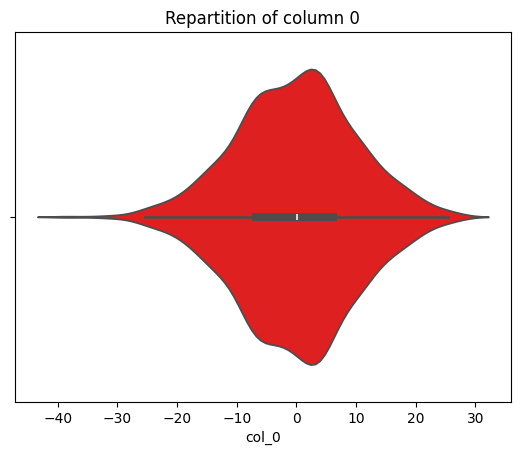

In [23]:
sns.violinplot(data=df, x="col_0",color="red").set_title("Repartition of column 0")


**Exercice**: plot the same boxplot in color red.

## Histograms

Text(0.5, 1.0, 'Repartition of column 0')

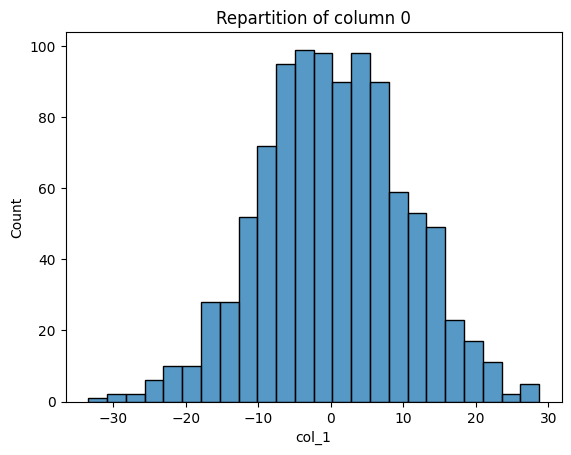

In [24]:
sns.histplot(data=df, x="col_1").set_title("Repartition of column 0")

**Exercice**: set the bin width to 10 and interprete the results.

Text(0.5, 1.0, 'Repartition of column 0')

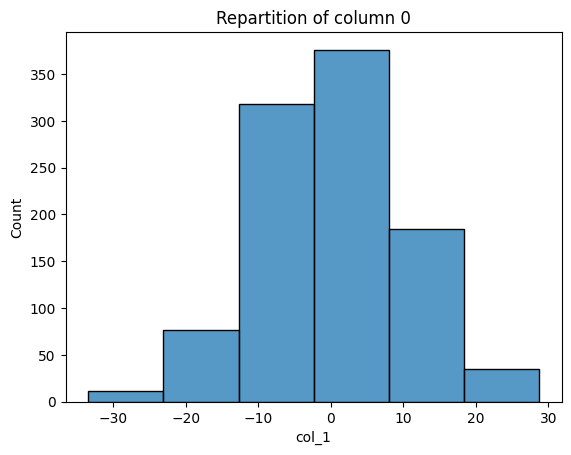

In [25]:
sns.histplot(data=df, x="col_1",binwidth=10).set_title("Repartition of column 0")

### interpretation of Repartition 
the distribution is symetrical around 0


### Scatterplots and curve estimation


<Axes: xlabel='col_0', ylabel='col_1'>

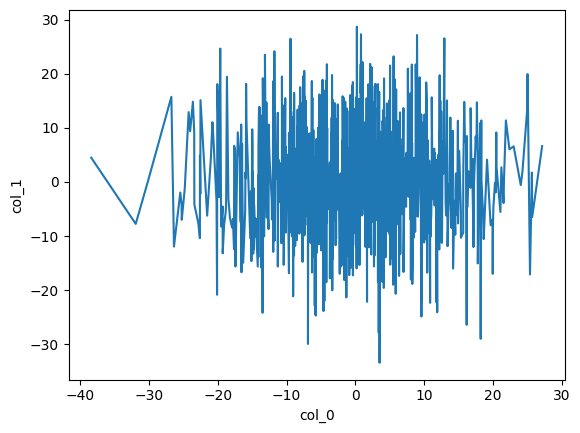

In [26]:
sns.lineplot(data=df, x="col_0", y="col_1")

Text(0.5, 1.0, 'plot of first and second col')

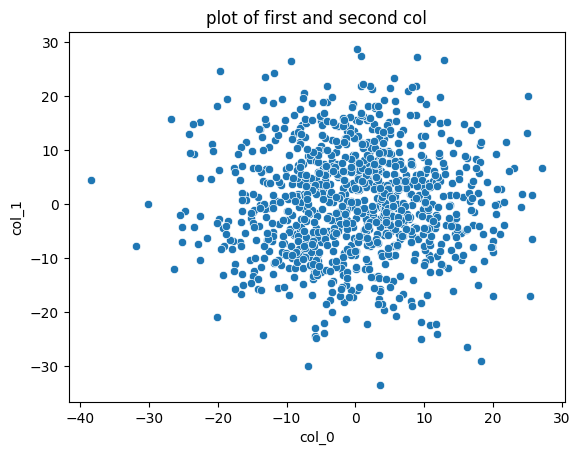

In [27]:
sns.scatterplot(data=df, x="col_0", y="col_1").set_title("plot of first and second col")

**Exercice**: Add a title to the plot.

done